# Recreation.gov Reservations - 2021
Reservation data for Recreation.gov is published in [Recreational Information Database](ridb.recreation.gov)

The 2021 dataset is available [here](https://ridb.recreation.gov/downloads/reservations2021.zip)

In [27]:
import pandas as pd

In [28]:
dfReservations2021 = pd.read_csv('./FY21 Historical Reservations Full.csv')

KeyboardInterrupt: 

In [ ]:
dfReservations2021.shape

(8354633, 35)

In [ ]:
dfReservations2021.info

<bound method DataFrame.info of                       historicalreservationid   ordernumber agency  orgid  \
0        edd9085a-a89f-4787-b9ec-e0794e5ac1b4  0201638440-1    BLM  126.0   
1        1d1d4d6a-3d57-47d0-9212-d9a4411555c0  0202157822-1    BLM  126.0   
2        bca72357-5824-4484-9eac-a824f5c00622  0208506393-1    BLM  126.0   
3        cbf1ce58-fb2a-4605-9474-cf27f1ce4052  0208506393-2    BLM  126.0   
4        b3e1899a-aa31-4948-8d47-29af5f6ea85f  0217769313-1    BLM  126.0   
...                                       ...           ...    ...    ...   
8354628  39fb8f7c-95ad-4020-a39e-d7aa954f8266  0397783574-1    NaN  131.0   
8354629  4cf91c2f-2a08-4c67-a041-bc16aa11a822  0397783574-2    NaN  131.0   
8354630  62a36ac8-b7db-4cda-ab68-71509d70afd7  0398026423-1    NaN  131.0   
8354631  05bea9aa-aa31-46d5-9425-e10d19a17766  0398781775-1    NaN  131.0   
8354632  3792e279-28b5-4fe5-bb29-6dc3545d841c  0399064881-1    NaN  131.0   

                                 codehierar

In [ ]:
dfReservations2021.dtypes

historicalreservationid     object
ordernumber                 object
agency                      object
orgid                      float64
codehierarchy               object
regioncode                  object
regiondescription           object
parentlocationid            object
parentlocation              object
legacyfacilityid           float64
park                        object
sitetype                    object
usetype                     object
productid                   object
inventorytype               object
facilityid                  object
facilityzip                float64
facilitystate               object
facilitylongitude          float64
facilitylatitude           float64
customerzip                 object
tax                        float64
usefee                     float64
tranfee                    float64
attrfee                    float64
totalbeforetax             float64
discount                   float64
totalpaid                  float64
startdate           

In [ ]:
dfReservations2021.head()

,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,legacyfacilityid,...,totalbeforetax,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength
0,edd9085a-a89f-4787-b9ec-e0794e5ac1b4,0201638440-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,58.0,0.0,58.0,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.0,NaN,0.0
1,1d1d4d6a-3d57-47d0-9212-d9a4411555c0,0202157822-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,33.0,0.0,33.0,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.0,NaN,0.0
2,bca72357-5824-4484-9eac-a824f5c00622,0208506393-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,33.0,0.0,33.0,2020-10-02 00:00:00.000,2020-10-03 00:00:00.000,2020-09-19 01:03:11.146,1 day,0.0,NaN,0.0
3,cbf1ce58-fb2a-4605-9474-cf27f1ce4052,0208506393-2,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,25.0,0.0,25.0,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.0,NaN,0.0
4,b3e1899a-aa31-4948-8d47-29af5f6ea85f,0217769313-1,BLM,126.0,|1|70901|72193|72194|146090,AK,Alaska,72195,White Mountains National Recreation Area,146090.0,...,18.0,0.0,18.0,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.0,NaN,0.0


In [ ]:
# columns in dataframe
list(dfReservations2021)

['historicalreservationid',
 'ordernumber',
 'agency',
 'orgid',
 'codehierarchy',
 'regioncode',
 'regiondescription',
 'parentlocationid',
 'parentlocation',
 'legacyfacilityid',
 'park',
 'sitetype',
 'usetype',
 'productid',
 'inventorytype',
 'facilityid',
 'facilityzip',
 'facilitystate',
 'facilitylongitude',
 'facilitylatitude',
 'customerzip',
 'tax',
 'usefee',
 'tranfee',
 'attrfee',
 'totalbeforetax',
 'discount',
 'totalpaid',
 'startdate',
 'enddate',
 'orderdate',
 'nights',
 'numberofpeople',
 'equipmentdescription',
 'equipmentlength']

## Observations

- `historicalreservationid` - this is a GUID, which is not helpful
- `ordernumber` - this is hyphenated, ie 1234-2, which looks like versions of a single order
- `codehierarchy` - pipe-delimited, appears to be for internal reporting
- `parentlocationid` and `parentlocation` - duplicative
- `legacyfacilityid` - legacy unique identifier
- `park` - duplicative
- `sitetype`, `usetype`, `productid`, `inventorytype` - type of transaction information
- `facility` - geographic information on multiple dimensions
- `customerzip` - likely customer dimension
- `nights` - format of X day(s), likely derived from `enddate` - `startdate`
- `equipmentdescription` and `equipmentlength` - not applicable

In [ ]:
dfReservations2021.drop(columns=['historicalreservationid', 'regioncode', 'regiondescription', 'parentlocation', 'codehierarchy', 'legacyfacilityid', 'tax', 'usefee', 'tranfee', 'attrfee', 'totalbeforetax', 'discount', 'equipmentdescription', 'equipmentlength'], inplace=True)

## Order Number

In [ ]:
# https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns
dfReservations2021[['orderno', 'orderversion']] = dfReservations2021['ordernumber'].str.split('-', 1, expand=True)

In [ ]:
dfReservations2021.head()

,ordernumber,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,...,facilitylatitude,customerzip,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,orderno,orderversion
0,0201638440-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,99821,CAMPING,252494,...,65.427497,NaN,58.0,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.0,0201638440,1
1,0202157822-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,33.0,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.0,0202157822,1
2,0208506393-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99706,33.0,2020-10-02 00:00:00.000,2020-10-03 00:00:00.000,2020-09-19 01:03:11.146,1 day,0.0,0208506393,1
3,0208506393-2,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99706,25.0,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.0,0208506393,2
4,0217769313-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,18.0,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.0,0217769313,1


In [ ]:
dfReservations2021[['orderno', 'orderversion']].max()

orderno         499981626.0
orderversion            9.0
dtype: float64

In [ ]:
sOrders = dfReservations2021.groupby(['orderno'])['orderversion'].max()

In [ ]:
type(sOrders)

pandas.core.series.Series

In [ ]:
dfOrders = pd.DataFrame(sOrders)

In [ ]:
dfOrders.head(50)

,orderversion
orderno,
0100750673,1
0103730768,1
0103824320,1
0107192443,1
0107670943,1
0108974912,1
0109113266,1
0112808793,2
0114091111,1


In [ ]:
dfOrders.reset_index(inplace=True)

In [ ]:
dfReservations2021 = dfReservations2021.merge(dfOrders,on=['orderno','orderversion'])

In [ ]:
dfReservations2021.shape

(7660415, 23)

In [ ]:
dfReservations2021.head()

,ordernumber,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,...,facilitylatitude,customerzip,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,orderno,orderversion
0,0201638440-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,99821,CAMPING,252494,...,65.427497,NaN,58.0,2020-10-08 00:00:00.000,2020-10-10 00:00:00.000,2020-09-10 09:16:58.400,2 days,1.0,0201638440,1
1,0202157822-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,33.0,2020-10-23 00:00:00.000,2020-10-24 00:00:00.000,2020-09-28 23:22:18.538,1 day,2.0,0202157822,1
2,0208506393-2,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99706,25.0,2020-10-03 00:00:00.000,2020-10-04 00:00:00.000,2020-09-19 01:03:11.146,1 day,2.0,0208506393,2
3,0217769313-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,18.0,2020-10-10 00:00:00.000,2020-10-11 00:00:00.000,2020-09-16 19:57:02.020,1 day,0.0,0217769313,1
4,0222024275-1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,...,65.427497,99709,18.0,2020-10-09 00:00:00.000,2020-10-10 00:00:00.000,2020-09-16 19:48:32.168,1 day,1.0,0222024275,1


## Stats

In [ ]:
dfReservations2021['agency'].unique()

array(['BLM', nan, 'BOR', 'FWS', 'NARA', 'NPS', 'USACE', 'USFS'],
      dtype=object)

In [ ]:
dfReservations2021.groupby('agency')['totalpaid'].sum()

agency
BLM      8.009215e+06
BOR      6.912655e+05
FWS      5.329171e+05
NARA     6.573400e+04
NPS      6.797756e+07
USACE    6.535905e+07
USFS     8.922777e+07
Name: totalpaid, dtype: float64

In [ ]:
dfReservations2021.groupby('park')['totalpaid'].sum()

park
 Evans Campground                                                  28761.25
 Gifford Campground                                                38058.75
 Kamloops Island Campground                                         9889.00
(LAKE ALPINE)  SILVER TIP CAMPGROUND                               51395.67
(LAKE ALPINE) SILVER VALLEY CAMPGROUND                             34805.00
                                                                    ...    
Yellowstone Non-Commercially Guided Snowmobile Access Program      21188.00
Yosemite National Park Ticketed Entry                            5246314.00
ZILPO - DANIEL BOONE NAT. FOR.                                    286142.79
ZIPS PLACE CABIN                                                   20068.00
Zion National Park Shuttle Tickets                                747053.00
Name: totalpaid, Length: 3952, dtype: float64

In [ ]:
dfReservations2021.groupby('inventorytype')['totalpaid'].sum()

inventorytype
ACTIVITYPASS       1.369549e+06
CAMPING            1.822354e+08
DONATION           1.000000e+02
LOTTERY_CAMPING    1.229200e+05
LOTTERY_PERMIT     2.675889e+06
LOTTERY_TICKET     2.874900e+04
PERMIT             1.652146e+07
QUEUE_LOTTERY      6.499200e+04
RENTAL             2.922000e+03
TICKET             1.172156e+07
TIMED_ENTRY        1.036100e+07
TREE_PERMIT        2.368829e+06
VEHICLE_PERMIT     4.401374e+06
Name: totalpaid, dtype: float64

In [ ]:
dfReservations2021['nights'].unique()

array(['2 days', '1 day', '3 days', '8 days', '00:00:00', '21 days',
       '29 days', '30 days', '23 days', '9 days', '-2 days', '22 days',
       '4 days', nan, '-1 days -14:47:10.998269', '5 days', '7 days',
       '14 days', '13 days', '6 days', '10 days', '12 days', '11 days',
       '35 days', '16 days', '17 days', '26 days', '58 days', '32 days',
       '-20 days', '-21:55:08.125762', '364 days', '19 days', '129 days',
       '27 days', '18 days', '-5 days', '-13 days', '-19 days', '-3 days',
       '142 days', '-4 days', '40 days', '15 days', '106 days', '-6 days',
       '24 days', '-1 days', '42 days', '-12 days', '33 days', '211 days',
       '62 days', '36 days', '31 days', '-10 days', '-22 days', '50 days',
       '377 days', '372 days', '374 days', '370 days', '368 days',
       '390 days', '375 days', '379 days', '386 days', '383 days',
       '373 days', '380 days', '385 days', '392 days', '371 days',
       '376 days', '365 days', '393 days', '366 days', '391 days',
  

## Camping

In [ ]:
dfReservations2021 = dfReservations2021[dfReservations2021['inventorytype'] == 'CAMPING']

In [29]:
dfReservations2021.groupby('agency')['totalpaid'].sum()

agency
BLM      2.080946e+06
BOR      6.912655e+05
FWS      3.111091e+05
NPS      3.951534e+07
USACE    6.509038e+07
USFS     7.453539e+07
Name: totalpaid, dtype: float64

In [30]:
dfReservations2021.groupby('park')['totalpaid'].sum()

park
 Evans Campground                                                           28761.25
 Gifford Campground                                                         38058.75
 Kamloops Island Campground                                                  9889.00
(LAKE ALPINE)  SILVER TIP CAMPGROUND                                        51395.67
(LAKE ALPINE) SILVER VALLEY CAMPGROUND                                      34805.00
                                                                             ...    
Yaak River Campground (MT)                                                     60.00
Yakima River Canyon Campgrounds (Umtanum, Lmuma Creek, Big Pines, Roza)     61959.00
Yellowjacket Creek Recreation Area                                            600.00
ZILPO - DANIEL BOONE NAT. FOR.                                             286142.79
ZIPS PLACE CABIN                                                            20068.00
Name: totalpaid, Length: 3628, dtype: float64

### Zip Code

Zip code is a primary dimension for grouping users.

In [31]:
dfReservations2021.groupby('park')['customerzip'].count()

park
 Evans Campground                                                           425
 Gifford Campground                                                         577
 Kamloops Island Campground                                                 136
(LAKE ALPINE)  SILVER TIP CAMPGROUND                                        742
(LAKE ALPINE) SILVER VALLEY CAMPGROUND                                      487
                                                                           ... 
Yaak River Campground (MT)                                                    2
Yakima River Canyon Campgrounds (Umtanum, Lmuma Creek, Big Pines, Roza)    1356
Yellowjacket Creek Recreation Area                                            4
ZILPO - DANIEL BOONE NAT. FOR.                                             2548
ZIPS PLACE CABIN                                                            158
Name: customerzip, Length: 3628, dtype: int64

In [32]:
# explore unique zip codes
dfReservations2021['customerzip'].unique()

array([nan, '99709', '99706', ..., '99699', '99891', '96923'],
      dtype=object)

In [33]:
# drop records with no zip code
dfReservations2021.dropna(subset=['customerzip'], inplace=True)

In [34]:
# truncate zip to 5 digit value
dfReservations2021['cleanzip'] = dfReservations2021.customerzip.str.extract(r'(\d{5})')

In [35]:
dfReservations2021['cleanzip']

1          99709
2          99706
3          99709
4          99709
6          84401
           ...  
7660324    84050
7660325    88030
7660326    87059
7660327    87008
7660328    87305
Name: cleanzip, Length: 2920335, dtype: object

In [36]:
# how many unique zip codes?
len(dfReservations2021['cleanzip'].unique())

33490

## Nights

In [37]:
dfReservations2021.nights.unique()

array(['1 day', '3 days', '2 days', '00:00:00', '21 days', '29 days',
       '30 days', '8 days', '23 days', '9 days', '-2 days', '22 days',
       '5 days', '7 days', '14 days', '4 days', '6 days', '10 days',
       '13 days', '12 days', '11 days', '35 days', '16 days', '17 days',
       '26 days', '58 days', '32 days', '-20 days', '19 days', '27 days',
       '18 days', '-5 days', '-13 days', '-19 days', '-3 days',
       '142 days', '-4 days', '40 days', '15 days', '106 days', '-1 days',
       '42 days', '-12 days', '33 days', '211 days', '36 days', nan,
       '31 days', '-6 days', '-10 days', '-22 days', '-44 days',
       '-9 days', '53 days', '37 days', '71 days', '121 days', '-40 days',
       '93 days', '81 days', '49 days', '80 days', '45 days', '51 days',
       '38 days', '-25 days', '-34 days', '24 days', '52 days', '91 days',
       '-18 days', '55 days', '-146 days', '-110 days', '43 days',
       '64 days', '25 days', '135 days', '176 days', '123 days',
       '113 day

In [38]:
def format_nights(night_str):
    try:
        result = night_str.split(' ')
        return int(result[0])
    except:
        return 0

In [39]:
format_nights('6 days')

6

In [40]:
dfReservations2021['cleannights'] = dfReservations2021.apply(lambda x: format_nights(x['nights']), axis=1)

### Data Types

Cast columns to correct data type

In [41]:
dfReservations2021['startdate'] = pd.to_datetime(dfReservations2021['startdate'], errors='coerce')

In [42]:
dfReservations2021['enddate'] = pd.to_datetime(dfReservations2021['enddate'], errors='coerce')

In [43]:
dfReservations2021['orderdate'] = pd.to_datetime(dfReservations2021['orderdate'], errors='coerce')

In [44]:
dfReservations2021['numberofpeople'] = pd.to_numeric(dfReservations2021['numberofpeople'], downcast='integer')

In [45]:
dfReservations2021['cleanzip'] = pd.to_numeric(dfReservations2021['cleanzip'], downcast='integer')

In [46]:
dfReservations2021['cleannights'] = pd.to_numeric(dfReservations2021['cleannights'], downcast='integer')

In [47]:
dfReservations2021['participation'] = dfReservations2021['numberofpeople'] * dfReservations2021['cleannights']
dfReservations2021['participation'] = pd.to_numeric(dfReservations2021['participation'], downcast='integer')
# drop where row is zero or less
indices = dfReservations2021[dfReservations2021['participation'] < 0].index
dfReservations2021.drop(indices, inplace=True)

In [48]:
dfReservations2021['participation'] = pd.to_numeric(dfReservations2021['participation'], downcast='integer')

In [49]:
# review progress
dfReservations2021.dtypes

ordernumber                  object
agency                       object
orgid                       float64
parentlocationid             object
park                         object
sitetype                     object
usetype                      object
productid                    object
inventorytype                object
facilityid                   object
facilityzip                 float64
facilitystate                object
facilitylongitude           float64
facilitylatitude            float64
customerzip                  object
totalpaid                   float64
startdate            datetime64[ns]
enddate              datetime64[ns]
orderdate            datetime64[ns]
nights                       object
numberofpeople              float64
orderno                      object
orderversion                 object
cleanzip                    float64
cleannights                   int16
participation               float64
dtype: object

In [52]:
proposed_features = ['agency',
                     'orgid',
                     'parentlocationid',
                     'park',
                     'sitetype',
                     'usetype',
                     'productid',
                     'inventorytype',
                     'facilityid',
                     'facilityzip',
                     'facilitystate',
                     'facilitylongitude',
                     'facilitylatitude',
                     'startdate',
                     'enddate',
                     'orderdate',
                     'numberofpeople',
                     'cleanzip',
                     'cleannights',
                     'participation']

In [53]:
dfFeatures = dfReservations2021[proposed_features]

In [54]:
dfFeatures.head()

,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,facilityzip,facilitystate,facilitylongitude,facilitylatitude,startdate,enddate,orderdate,numberofpeople,cleanzip,cleannights,participation
1,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,Alaska,-147.243361,65.427497,2020-10-23,2020-10-24,2020-09-28 23:22:18.538,2.0,99709.0,1,2.0
2,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,Alaska,-147.243361,65.427497,2020-10-03,2020-10-04,2020-09-19 01:03:11.146,2.0,99706.0,1,2.0
3,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,Alaska,-147.243361,65.427497,2020-10-10,2020-10-11,2020-09-16 19:57:02.020,0.0,99709.0,1,0.0
4,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,Alaska,-147.243361,65.427497,2020-10-09,2020-10-10,2020-09-16 19:48:32.168,1.0,99709.0,1,1.0
6,BLM,126.0,72195,White Mountains National Recreation Area - Ala...,CABIN NONELECTRIC,Overnight,639772,CAMPING,252494,99730.0,Alaska,-147.243361,65.427497,2020-10-26,2020-10-27,2020-09-30 18:32:29.447,4.0,84401.0,1,4.0


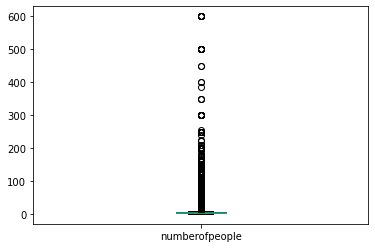

In [55]:
# typical group size
dfFeatures.numberofpeople.plot.box()

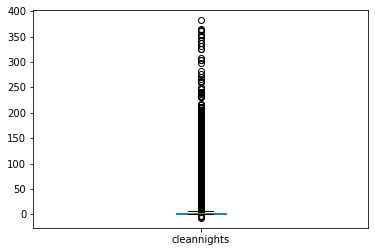

In [56]:
# typical nights
dfFeatures.cleannights.plot.box()

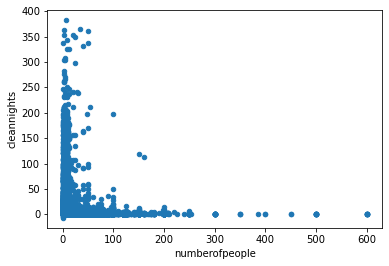

In [57]:
# plot people vs nights
dfFeatures.plot.scatter(x='numberofpeople', y='cleannights')

## Conclusion

The nights and number of people derived from the dataset are unreliable and will require additional fixing.

Date time values have some default values that are problematic.

The order number appears more than once, further study is necessary to de-duplicate and take the final entry, ie, XXX-2 instead of XXX-1.

In [58]:
# use proposed features and export camping reservations
dfFeatures.to_csv('REC.csv', index=False)

In [59]:
# export camping reservations for ALS
dfALSProduct = dfFeatures[['productid', 'cleanzip', 'participation']]
dfALSProduct.rename(columns={'productid': 'item', 'cleanzip': 'user', 'participation': 'rating'})
dfALSProduct.to_csv('REC_ALS.csv', index=False)

In [60]:
# export camping reservations for ALS
dfALSFacility = dfFeatures[['facilityid', 'cleanzip', 'participation']]
dfALSProduct.rename(columns={'productid': 'item', 'cleanzip': 'user', 'participation': 'rating'})
dfALSFacility.to_csv('REC_ALS_Facility.csv', index=False)

## Conclusion

The nights and number of people derived from the dataset are unreliable and will require additional fixing.

Date time values have some default values that are problematic.

In [61]:
dfFeatures.cleannights.unique()

array([  1,   3,   2,   0,  21,  29,  30,   8,  23,   9,  22,   5,   7,
        14,   4,   6,  10,  13,  12,  11,  35,  16,  17,  26,  58,  32,
        19,  27,  18, 142,  40,  15, 106,  42,  33, 211,  36,  31,  53,
        37,  71, 121,  93,  81,  49,  80,  45,  51,  38,  24,  52,  91,
        55,  43,  64,  25, 135, 176, 123, 113, 115,  99,  96, 114, 241,
        72, 136,  54, 169,  62,  50, 266, 191, 215, 137,  20,  92, 138,
        69, 171, 185,  95,  98,  61, 130, 181, 157,  59,  78, 125,  39,
       162,  28, 179, 183, 129, 184, 163, 164, 104, 134,  94,  68,  85,
       218, 122, 168, 101, 297,  60,  79,  89,  34,  57,  44,  82, 194,
       178,  65, 175, 154, 105,  48, 151, 190, 150, 187,  63,  67, 141,
        97, 344, 144, 109,  56, 161,  41, 117, 170,  84, 177, 364,  -4,
        86, 100, 156, 128, 149, 107, 111, 127,  77, 120,  76, 182,  66,
       240, 203,  90, 200,  75, 303, 174, 133, 331,  46, 172, 119, 148,
       197, 205, 124, 108, 139,  87,  74, 153, 132,  83,  73, 11

In [62]:
dfFeatures['datediff'] = (dfFeatures.enddate - dfFeatures.startdate).dt.days

<ipython-input-62-5bab3f8f8015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFeatures['datediff'] = (dfFeatures.enddate - dfFeatures.startdate).dt.days


In [63]:
dfFeatures['datediff'].unique()

array([  1.,   3.,   2.,   0.,  21.,  29.,  30.,   8.,  23.,   9.,  22.,
         5.,   7.,  14.,   4.,   6.,  10.,  13.,  12.,  11.,  35.,  16.,
        17.,  26.,  58.,  32.,  19.,  27.,  18., 142.,  40.,  15., 106.,
        42.,  33., 211.,  36.,  nan,  31.,  53.,  37.,  71., 121.,  93.,
        81.,  49.,  80.,  45.,  51.,  38.,  24.,  52.,  91.,  55.,  43.,
        64.,  25., 135., 176., 123., 113., 115.,  99.,  96., 114., 241.,
        72., 136.,  54., 169.,  62.,  50., 266., 191., 215., 137.,  20.,
        92., 138.,  69., 171., 185.,  95.,  98.,  61., 130., 181., 157.,
        59.,  78., 125.,  39., 162.,  28., 179., 183., 129., 184., 163.,
       164., 104., 134.,  94.,  68.,  85., 218., 122., 168., 101., 297.,
        60.,  79.,  89.,  34.,  57.,  44.,  82., 194., 178.,  65., 175.,
       154., 105.,  48., 151., 190., 150., 187.,  63.,  67., 141.,  97.,
       344., 144., 109.,  56., 161.,  41., 117., 170.,  84., 177., 364.,
        -4.,  86., 100., 156., 128., 149., 107., 11

In [64]:
dfFeatures[dfFeatures['cleannights'] != dfFeatures['datediff']]

,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,facilityzip,...,facilitylongitude,facilitylatitude,startdate,enddate,orderdate,numberofpeople,cleanzip,cleannights,participation,datediff
405785,BLM,126.0,74977,Red Rock Canyon Campground,NaN,NaN,250877,CAMPING,250877,89135.0,...,-115.383889,36.131389,2021-09-17,NaT,2021-09-18 00:03:30.473,NaN,96555.0,0,NaN,NaN
1271698,NPS,128.0,74282,MATHER CAMPGROUND,NaN,NaN,232490,CAMPING,232490,86023.0,...,-112.120469,36.049722,2021-06-01,NaT,2020-12-08 02:18:02.636,NaN,55424.0,0,NaN,NaN
1287289,NPS,128.0,74282,MATHER CAMPGROUND,NaN,NaN,232490,CAMPING,232490,86023.0,...,-112.120469,36.049722,2021-04-05,NaT,2021-03-11 22:10:22.410,NaN,91501.0,0,NaN,NaN
1306286,NPS,128.0,74282,MATHER CAMPGROUND,NaN,NaN,232490,CAMPING,232490,86023.0,...,-112.120469,36.049722,2021-07-17,NaT,2021-07-17 19:53:04.490,NaN,33774.0,0,NaN,NaN
1568014,NPS,128.0,72451,Mammoth Campground (Yellowstone),NaN,NaN,247571,CAMPING,247571,82190.0,...,-110.693232,44.973609,2021-08-12,NaT,2021-03-24 14:00:37.977,NaN,33176.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242965,USFS,131.0,74904,CANEBRAKE HORSE CAMP,NaN,NaN,233913,CAMPING,233913,27371.0,...,-80.048611,35.439444,2020-12-31,NaT,2020-12-17 15:14:22.984,NaN,28334.0,0,NaN,NaN
7269827,USFS,131.0,74905,STANDING INDIAN CAMPGROUND,NaN,NaN,234228,CAMPING,234228,28734.0,...,-83.531944,35.078611,2020-10-15,NaT,2020-07-29 14:36:52.558,NaN,33549.0,0,NaN,NaN
7297746,USFS,131.0,72319,THUNDER ROCK CAMPGROUND,NaN,NaN,251938,CAMPING,251938,37362.0,...,-84.485556,35.076111,2021-04-22,NaT,2021-04-19 03:20:25.240,NaN,30080.0,0,NaN,NaN
7611726,USFS,131.0,72715,SYLVANIA WILDERNESS BACKCOUNTRY CAMPING,NaN,NaN,234526,CAMPING,234526,49969.0,...,-89.310556,46.244722,2021-08-06,NaT,2021-06-14 03:33:34.815,NaN,54665.0,0,NaN,NaN


In [65]:
dfFeatures[dfFeatures['numberofpeople'].isna()]

,agency,orgid,parentlocationid,park,sitetype,usetype,productid,inventorytype,facilityid,facilityzip,...,facilitylongitude,facilitylatitude,startdate,enddate,orderdate,numberofpeople,cleanzip,cleannights,participation,datediff
405785,BLM,126.0,74977,Red Rock Canyon Campground,NaN,NaN,250877,CAMPING,250877,89135.0,...,-115.383889,36.131389,2021-09-17,NaT,2021-09-18 00:03:30.473,NaN,96555.0,0,NaN,NaN
1271698,NPS,128.0,74282,MATHER CAMPGROUND,NaN,NaN,232490,CAMPING,232490,86023.0,...,-112.120469,36.049722,2021-06-01,NaT,2020-12-08 02:18:02.636,NaN,55424.0,0,NaN,NaN
1287289,NPS,128.0,74282,MATHER CAMPGROUND,NaN,NaN,232490,CAMPING,232490,86023.0,...,-112.120469,36.049722,2021-04-05,NaT,2021-03-11 22:10:22.410,NaN,91501.0,0,NaN,NaN
1306286,NPS,128.0,74282,MATHER CAMPGROUND,NaN,NaN,232490,CAMPING,232490,86023.0,...,-112.120469,36.049722,2021-07-17,NaT,2021-07-17 19:53:04.490,NaN,33774.0,0,NaN,NaN
1568014,NPS,128.0,72451,Mammoth Campground (Yellowstone),NaN,NaN,247571,CAMPING,247571,82190.0,...,-110.693232,44.973609,2021-08-12,NaT,2021-03-24 14:00:37.977,NaN,33176.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242965,USFS,131.0,74904,CANEBRAKE HORSE CAMP,NaN,NaN,233913,CAMPING,233913,27371.0,...,-80.048611,35.439444,2020-12-31,NaT,2020-12-17 15:14:22.984,NaN,28334.0,0,NaN,NaN
7269827,USFS,131.0,74905,STANDING INDIAN CAMPGROUND,NaN,NaN,234228,CAMPING,234228,28734.0,...,-83.531944,35.078611,2020-10-15,NaT,2020-07-29 14:36:52.558,NaN,33549.0,0,NaN,NaN
7297746,USFS,131.0,72319,THUNDER ROCK CAMPGROUND,NaN,NaN,251938,CAMPING,251938,37362.0,...,-84.485556,35.076111,2021-04-22,NaT,2021-04-19 03:20:25.240,NaN,30080.0,0,NaN,NaN
7611726,USFS,131.0,72715,SYLVANIA WILDERNESS BACKCOUNTRY CAMPING,NaN,NaN,234526,CAMPING,234526,49969.0,...,-89.310556,46.244722,2021-08-06,NaT,2021-06-14 03:33:34.815,NaN,54665.0,0,NaN,NaN
